In [1]:
import pandas as pd
import glob
import gc

# Demographics
Values of interest and their row IDs.

```
Pouplation General
1	Population, 2021 (1)
2	Population, 2016 (1)
3	Population percentage change, 2016 to 2021
4	Total private dwellings (2)
6	Population density per square kilometre
7	Land area in square kilometres

Income 

111	Total - Income statistics in 2020 for the population aged 15 years and over in private households - 100% data (10)
112	  Number of total income recipients aged 15 years and over in private households in 2020 - 100% data
113	    Median total income in 2020 among recipients ($)
114	  Number of after-tax income recipients aged 15 years and over in private households in 2020 - 100% data
115	    Median after-tax income in 2020 among recipients ($)

126	Total - Income statistics in 2020 for the population aged 15 years and over in private households - 25% sample data (11)
127	  Number of total income recipients aged 15 years and over in private households in 2020 - 25% sample data
128	    Average total income in 2020 among recipients ($)
129	  Number of after-tax income recipients aged 15 years and over in private households in 2020 - 25% sample data
130	    Average after-tax income in 2020 among recipients ($)

242	Total - Income statistics for private households - 100% data (26)
243	  Median total income of household in 2020 ($)
244	  Median after-tax income of household in 2020 ($)

Indigenous population
1402	Total - Indigenous identity for the population in private households - 25% sample data (44)
1403	  Indigenous identity (45)
```


In [2]:
characteristic_ids =  list(range(1,5)) +list(range(6,8))+ list(range(111,116)) + list(range(126,131)) + list(range(242,245)) + list(range(1402,1404))

In [3]:
short_names = {
#General
1:	"Pop_2021",
2:	"Pop_2016",
3:	"Pop_change_percent",
4:	"Private_Dwellings",
6:	"Pop_density_square_km",
7:	"Land_area_square_km",

#Income
111: "Income_count_total",
112: "Median_income_count",
113: "Median_income",
114: "After-tax_income-count",
115: "After-tax_income",

126: "Income_count_25_percent",
127: "Mean_income_count",
128: "Mean_income",
129: "After-tax_mean_income_count",
130: "After-tax_mean_income",

242: "Household_income_count",
243: "Median_household_income",
244: "Median_household_after-tax_income",

#Indigenous population
1402: "Indigenous_identity_count_total",
1403: "Indigenous_identity_count",
}

In [4]:
folder = '/Users/zacharyshand/ookla-statcan-analysis/data/census-2021/98-401-X2021006_eng_CSV/'
file_pat = '98-401-X2021006_English_CSV_data_*.csv'
outfile = '/Users/zacharyshand/ookla-statcan-analysis/data/census-2021/Census-Subset-Flat'

In [6]:
dfs = []
for file in glob.glob(folder + file_pat):
    name = file[:-4].split("_")[-1]
    print(name)
    df = pd.read_csv(file, encoding='latin-1')
    dfs.append(df)

    subset = df.loc[lambda s:s.CHARACTERISTIC_ID.isin(characteristic_ids)]

    columns = ['DGUID', 'CHARACTERISTIC_ID', 'C1_COUNT_TOTAL',] #columns for pivotting
    piv = subset[columns].pivot("DGUID","CHARACTERISTIC_ID", "C1_COUNT_TOTAL")
    piv.columns = pd.Index([short_names[id] for id in piv.columns])

    flat = pd.merge(
        subset.iloc[:,0:5].drop_duplicates(subset="DGUID"),
        piv, 
        on='DGUID',
        validate='1:m'
    )

    flat.to_csv(outfile + f"-{name}.csv", index=False)
    # flat.to_parquet(outfile + f"-{name}.parquet", index=False)
    

Prairies


/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='latin-1')
/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  piv = subset[columns].pivot("DGUID","CHARACTERISTIC_ID", "C1_COUNT_TOTAL")


Quebec


/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='latin-1')
/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  piv = subset[columns].pivot("DGUID","CHARACTERISTIC_ID", "C1_COUNT_TOTAL")


Ontario


/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='latin-1')
/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  piv = subset[columns].pivot("DGUID","CHARACTERISTIC_ID", "C1_COUNT_TOTAL")


Atlantic


/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='latin-1')
/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  piv = subset[columns].pivot("DGUID","CHARACTERISTIC_ID", "C1_COUNT_TOTAL")


Territories


/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='latin-1')
/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  piv = subset[columns].pivot("DGUID","CHARACTERISTIC_ID", "C1_COUNT_TOTAL")


BritishColumbia


/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='latin-1')
/var/folders/f4/kqzkmk390y91nf2d1_f_6mjc0000gn/T/ipykernel_39358/44051578.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  piv = subset[columns].pivot("DGUID","CHARACTERISTIC_ID", "C1_COUNT_TOTAL")


In [7]:
csds = flat.loc[lambda s:s.GEO_LEVEL=="Census subdivision"]

In [8]:
das = flat.loc[lambda s:s.GEO_LEVEL=="Dissemination area"]

In [9]:
das.Median_income_count.sum()/das.Pop_2021.sum()*100, (das.Median_income_count.count()/len(das))*100

(80.771600352658, 90.83843017329256)

In [10]:
csds.Median_income_count.sum()/csds.Pop_2021.sum()*100, csds.Median_income_count.count()/len(csds)*100

(81.17482946498006, 50.466045272969374)

<Axes: >

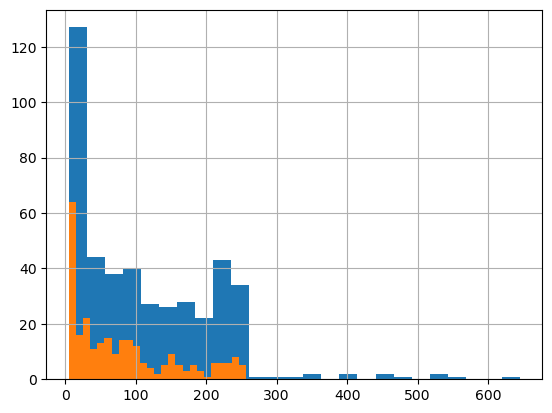

In [11]:
das[pd.isna(das.Median_income)].loc[lambda s:s.Pop_2021 > 0].Pop_2021.hist(bins=25)
csds[pd.isna(csds.Median_income)].loc[lambda s:s.Pop_2021 > 0].Pop_2021.hist(bins=25)

In [47]:
dfs = []
for file in glob.glob(outfile + "*.csv"):
    df = pd.read_csv(file)
    dfs.append(df)
df = pd.concat(dfs)
df = df.drop_duplicates(subset="DGUID") #Country level is duplicated in each file

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63409 entries, 0 to 5423
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CENSUS_YEAR                        63409 non-null  int64  
 1   DGUID                              63409 non-null  object 
 2   ALT_GEO_CODE                       63409 non-null  int64  
 3   GEO_LEVEL                          63409 non-null  object 
 4   GEO_NAME                           63409 non-null  object 
 5   Pop_2021                           63168 non-null  float64
 6   Pop_2016                           5459 non-null   float64
 7   Pop_change_percent                 5132 non-null   float64
 8   Private_Dwellings                  63168 non-null  float64
 9   Pop_density_square_km              63167 non-null  float64
 10  Land_area_square_km                63409 non-null  float64
 11  Income_count_total                 61029 non-null  floa

In [36]:
levels = df.GEO_LEVEL.unique()
metrics = ['Pop_2021', 'Income_count_total', 'Indigenous_identity_count_total']
for metric in metrics:
    print(f"{metric}")
    for level in levels:
        sub = df.loc[lambda s:s.GEO_LEVEL == level]
        pop_percent = sub[metric].sum()/sub.Pop_2021.sum()
        area_percent = sub[metric].count()/len(sub)

        print(f"{level:20s}: pop coverage {pop_percent:.1%}\tarea coverage {area_percent:.1%}")
    print()

Pop_2021
Country             : pop coverage 100.0%	area coverage 100.0%
Province            : pop coverage 100.0%	area coverage 100.0%
Census division     : pop coverage 100.0%	area coverage 100.0%
Census subdivision  : pop coverage 100.0%	area coverage 98.8%
Dissemination area  : pop coverage 100.0%	area coverage 99.7%
Territory           : pop coverage 100.0%	area coverage 100.0%

Income_count_total
Country             : pop coverage 82.0%	area coverage 100.0%
Province            : pop coverage 82.0%	area coverage 100.0%
Census division     : pop coverage 82.0%	area coverage 100.0%
Census subdivision  : pop coverage 82.0%	area coverage 88.2%
Dissemination area  : pop coverage 82.0%	area coverage 96.9%
Territory           : pop coverage 75.5%	area coverage 100.0%

Indigenous_identity_count_total
Country             : pop coverage 98.2%	area coverage 100.0%
Province            : pop coverage 98.2%	area coverage 100.0%
Census division     : pop coverage 98.2%	area coverage 100.0%
Census

In [49]:
df

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,Pop_2021,Pop_2016,Pop_change_percent,Private_Dwellings,Pop_density_square_km,...,Income_count_25_percent,Mean_income_count,Mean_income,After-tax_mean_income_count,After-tax_mean_income,Household_income_count,Median_household_income,Median_household_after-tax_income,Indigenous_identity_count_total,Indigenous_identity_count
0,2021,2021A000011124,1,Country,Canada,36991981.0,35151728.0,5.2,16284235.0,4.2,...,30335920.0,29242935.0,54450.0,29257325.0,44920.0,14978940.0,84000.0,73000.0,36328480.0,1807250.0
1,2021,2021A000224,24,Province,Quebec,8501833.0,8164361.0,4.1,4050164.0,6.5,...,6918730.0,6738410.0,51160.0,6740360.0,41840.0,3749035.0,72500.0,63200.0,8308480.0,205010.0
2,2021,2021A00032401,2401,Census division,"Communauté maritime des Îles-de-la-Madeleine, ...",12654.0,12475.0,1.4,6665.0,67.5,...,11040.0,10955.0,48680.0,10955.0,40480.0,5830.0,75500.0,66000.0,12455.0,255.0
3,2021,2021A00052401023,2401023,Census subdivision,"Les Îles-de-la-Madeleine, Municipalité (MÉ)",12190.0,12010.0,1.5,6413.0,78.6,...,10555.0,10465.0,48240.0,10470.0,40240.0,5610.0,75000.0,65500.0,11915.0,225.0
4,2021,2021S051224010019,24010019,Dissemination area,24010019,536.0,NaN,NaN,283.0,75.0,...,490.0,490.0,53800.0,490.0,43600.0,255.0,74000.0,65000.0,565.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63404,2021,2021S051213150211,13150211,Dissemination area,13150211,331.0,NaN,NaN,175.0,24.3,...,305.0,295.0,36800.0,295.0,32800.0,165.0,47600.0,45200.0,340.0,0.0
63405,2021,2021S051213150215,13150215,Dissemination area,13150215,400.0,NaN,NaN,237.0,37.6,...,340.0,335.0,37400.0,335.0,33000.0,195.0,56000.0,50400.0,375.0,0.0
63406,2021,2021A00051315040,1315040,Census subdivision,"Maisonnette, Village (VL)",535.0,495.0,8.1,401.0,41.4,...,455.0,450.0,34200.0,450.0,30600.0,295.0,42400.0,39200.0,495.0,0.0
63407,2021,2021S051213150209,13150209,Dissemination area,13150209,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.to_csv(outfile+"AllRegions.csv", index=False)